In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [79]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [80]:
import os

# Buat folder untuk menyimpan output
os.makedirs('/content/images', exist_ok=True)
os.makedirs('/content/models', exist_ok=True)
os.makedirs('/content/data', exist_ok=True)

print("✅ Folder telah dibuat:")
print("  - /content/images/ (untuk menyimpan visualisasi)")
print("  - /content/models/ (untuk menyimpan model)")
print("  - /content/data/ (untuk dataset)")

✅ Folder telah dibuat:
  - /content/images/ (untuk menyimpan visualisasi)
  - /content/models/ (untuk menyimpan model)
  - /content/data/ (untuk dataset)


In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import urllib.request

# Download dataset Parkinsons
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
urllib.request.urlretrieve(url, '/content/data/parkinsons.data')

print("✅ Dataset Parkinsons telah didownload")

✅ Dataset Parkinsons telah didownload


In [83]:
df = pd.read_csv('/content/data/parkinsons.data')
print(f"Shape dataset: {df.shape}")
df.head()

Shape dataset: (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [84]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non

In [85]:
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


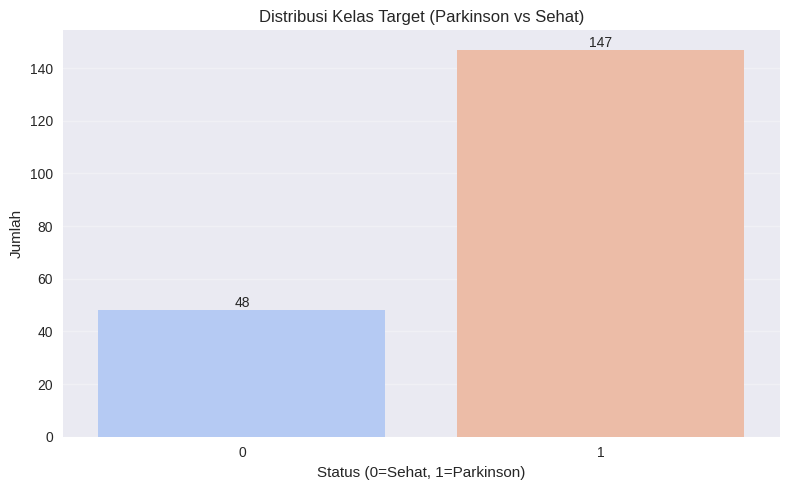

Jumlah sehat (0): 48
Jumlah Parkinson (1): 147
✅ Gambar disimpan di: /content/images/distribusi_kelas.png


In [86]:
plt.figure(figsize=(8, 5))
sns.countplot(x='status', data=df, palette='coolwarm')
plt.title('Distribusi Kelas Target (Parkinson vs Sehat)')
plt.xlabel('Status (0=Sehat, 1=Parkinson)')
plt.ylabel('Jumlah')
plt.grid(axis='y', alpha=0.3)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.savefig('/content/images/distribusi_kelas.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Jumlah sehat (0): {len(df[df['status']==0])}")
print(f"Jumlah Parkinson (1): {len(df[df['status']==1])}")
print("✅ Gambar disimpan di: /content/images/distribusi_kelas.png")

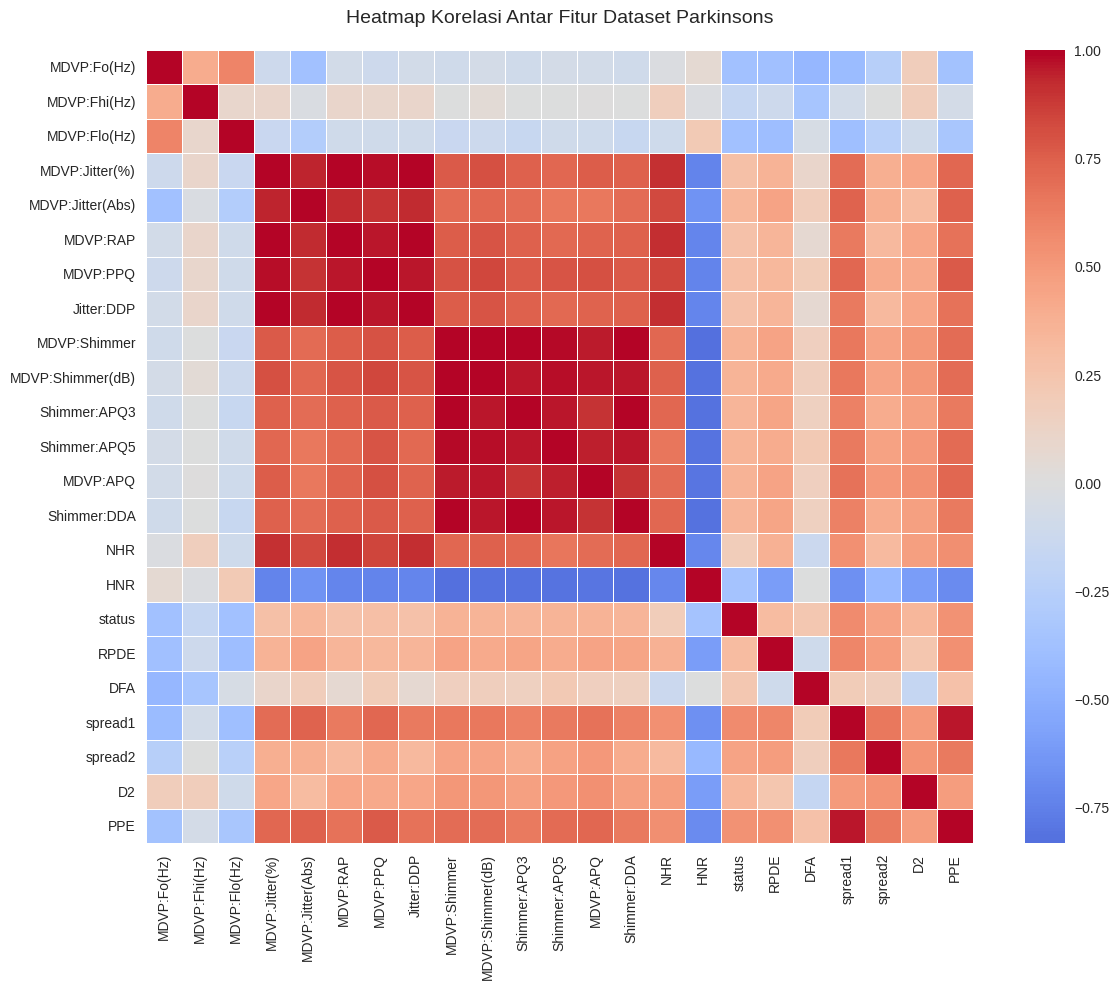

10 Fitur dengan Korelasi Tertinggi dengan Status:
status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
Name: status, dtype: float64
✅ Gambar disimpan di: /content/images/heatmap_korelasi.png


In [87]:
corr_matrix = df.drop('name', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Dataset Parkinsons', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('/content/images/heatmap_korelasi.png', dpi=300, bbox_inches='tight')
plt.show()

status_corr = corr_matrix['status'].sort_values(ascending=False)
print("10 Fitur dengan Korelasi Tertinggi dengan Status:")
print(status_corr.head(10))
print("✅ Gambar disimpan di: /content/images/heatmap_korelasi.png")

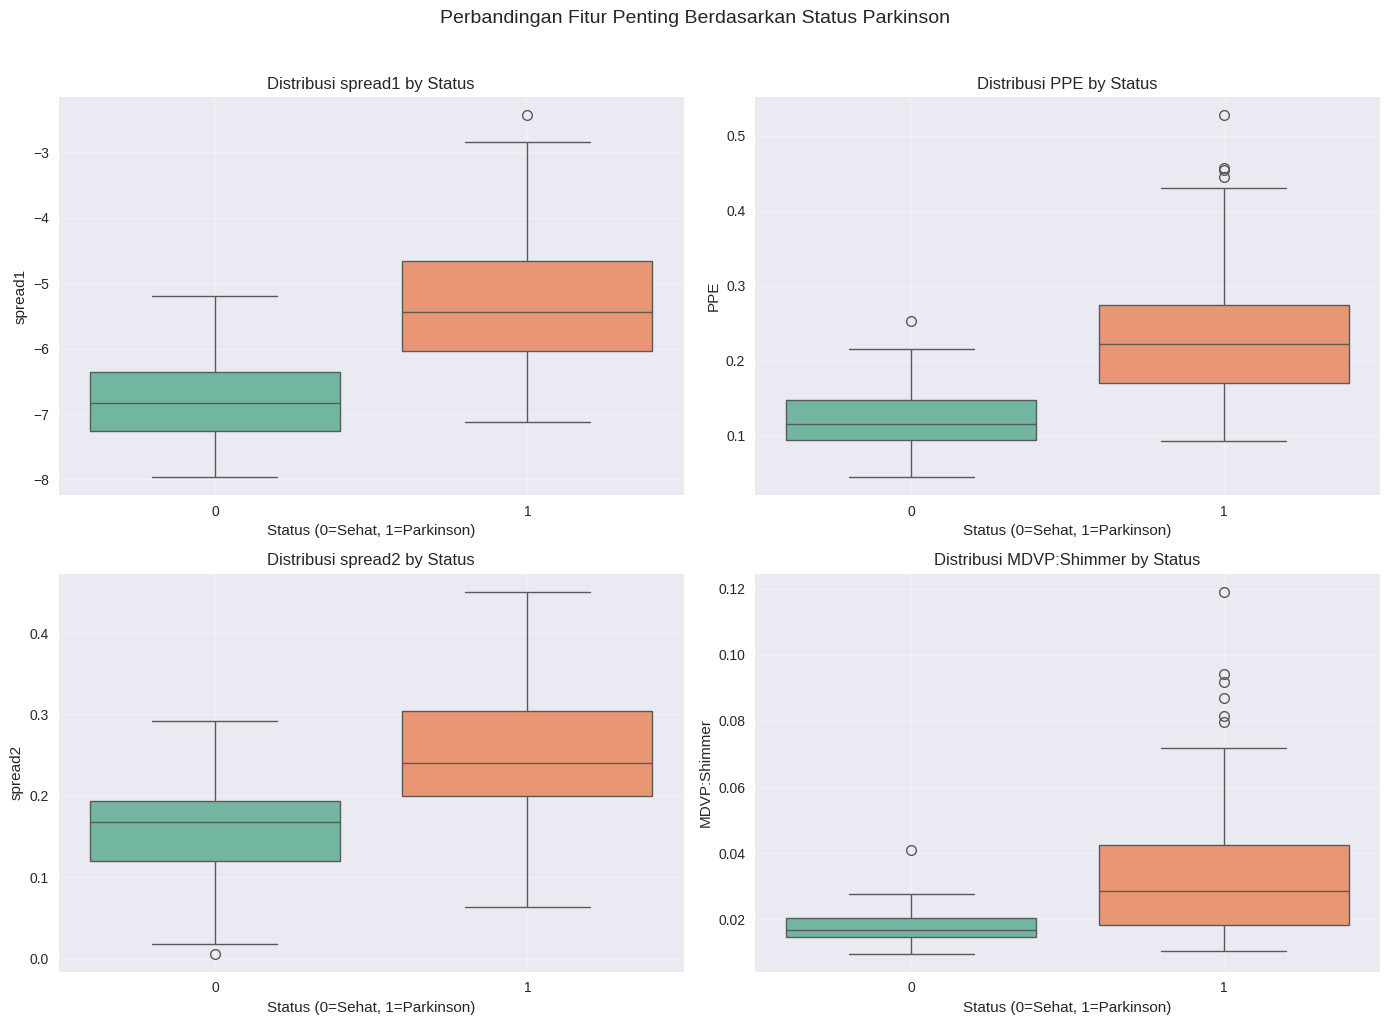

✅ Gambar disimpan di: /content/images/boxplot_fitur_penting.png


In [88]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
top_features = status_corr.index[1:5]

for idx, feature in enumerate(top_features):
    ax = axes[idx//2, idx%2]
    sns.boxplot(x='status', y=feature, data=df, ax=ax, palette='Set2')
    ax.set_title(f'Distribusi {feature} by Status', fontsize=12)
    ax.set_xlabel('Status (0=Sehat, 1=Parkinson)')
    ax.set_ylabel(feature)
    ax.grid(True, alpha=0.3)

plt.suptitle('Perbandingan Fitur Penting Berdasarkan Status Parkinson', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('/content/images/boxplot_fitur_penting.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gambar disimpan di: /content/images/boxplot_fitur_penting.png")

In [89]:
X = df.drop(['status', 'name'], axis=1)
y = df['status']

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Shape X: (195, 22)
Shape y: (195,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (156, 22)
Testing set: (39, 22)


In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data telah dinormalisasi menggunakan StandardScaler")

Data telah dinormalisasi menggunakan StandardScaler


In [92]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("="*50)
print("RANDOM FOREST CLASSIFIER")
print("="*50)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST CLASSIFIER
Accuracy: 0.9231

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [93]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:")
print(cm_rf)

Confusion Matrix Random Forest:
[[ 8  2]
 [ 1 28]]


In [94]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("="*50)
print("SUPPORT VECTOR MACHINE (SVM)")
print("="*50)
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SUPPORT VECTOR MACHINE (SVM)
Accuracy: 0.9231

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



In [95]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix SVM:")
print(cm_svm)

Confusion Matrix SVM:
[[ 7  3]
 [ 0 29]]


In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [97]:
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

dl_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [98]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("Training Deep Learning Model...")
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

print("\nTraining selesai!")

Training Deep Learning Model...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5747 - loss: 0.6624 - precision_1: 0.8432 - recall_1: 0.5795 - val_accuracy: 1.0000 - val_loss: 0.5722 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6937 - loss: 0.5529 - precision_1: 0.8548 - recall_1: 0.7239 - val_accuracy: 0.9062 - val_loss: 0.5100 - val_precision_1: 1.0000 - val_recall_1: 0.8846
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7675 - loss: 0.5197 - precision_1: 0.8914 - recall_1: 0.7844 - val_accuracy: 0.9062 - val_loss: 0.4720 - val_precision_1: 1.0000 - val_recall_1: 0.8846
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7286 - loss: 0.4442 - precision_1: 0.7760 - recall_1: 0.8480 - val_accuracy: 0.9062 - val_loss: 0.4369 - val_precision_1: 0.9600 - val_recall_1: 0.9231
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8738 - loss: 0.3429 - precision_1: 0.950

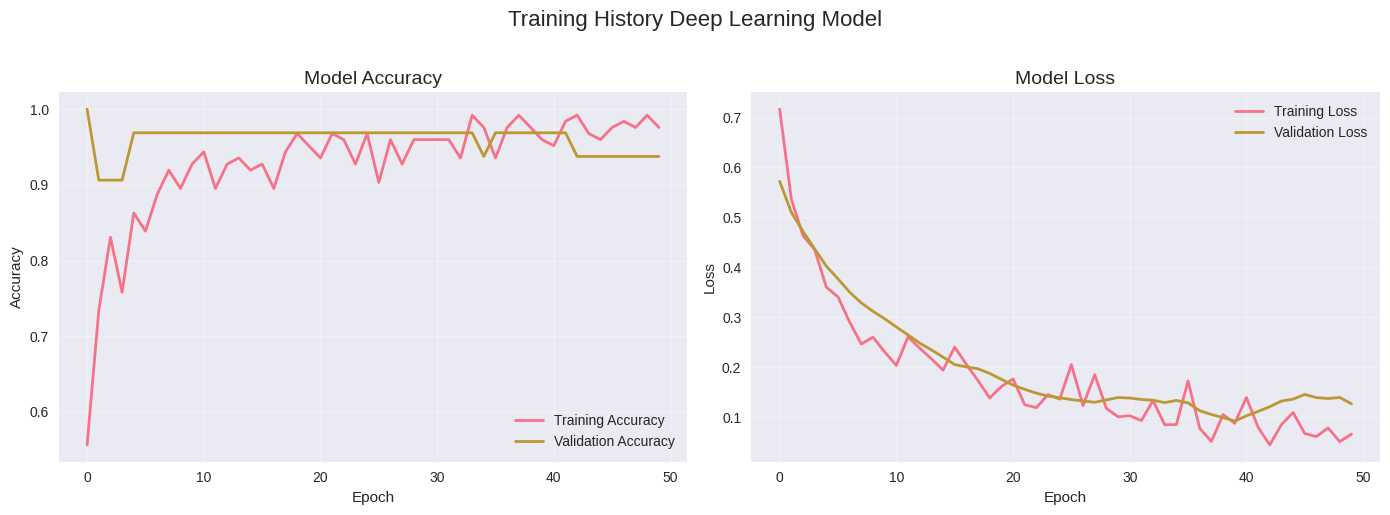

✅ Gambar disimpan di: /content/images/training_history.png


In [99]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Training History Deep Learning Model', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('/content/images/training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gambar disimpan di: /content/images/training_history.png")

In [100]:
dl_results = dl_model.evaluate(X_test_scaled, y_test, verbose=0)
print("="*50)
print("DEEP LEARNING MODEL")
print("="*50)
print(f"Test Loss: {dl_results[0]:.4f}")
print(f"Test Accuracy: {dl_results[1]:.4f}")

y_pred_dl_prob = dl_model.predict(X_test_scaled, verbose=0)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int).flatten()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))

DEEP LEARNING MODEL
Test Loss: 0.1220
Test Accuracy: 0.9487

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



In [101]:
models = ['Random Forest', 'SVM', 'Deep Learning']
accuracy_scores = [accuracy_rf, accuracy_svm, dl_results[1]]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['precision'],
        dl_results[2]
    ],
    'Recall': [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['recall'],
        dl_results[3]
    ]
})

print("PERBANDINGAN MODEL")
print("="*60)
print(comparison_df.round(4).to_string(index=False))

PERBANDINGAN MODEL
        Model  Accuracy  Precision  Recall
Random Forest    0.9231     0.9333  0.9655
          SVM    0.9231     0.9062  1.0000
Deep Learning    0.9487     0.9655  0.9655


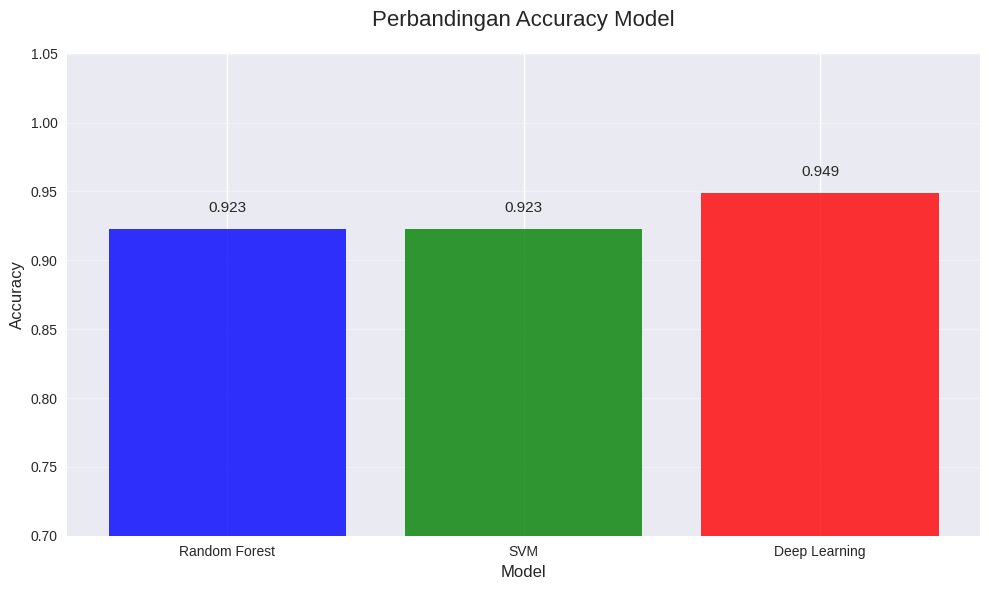

✅ Gambar disimpan di: /content/images/perbandingan_accuracy.png


In [102]:
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(models))
bars = plt.bar(x_pos, comparison_df['Accuracy'], color=['blue', 'green', 'red'], alpha=0.8)

plt.title('Perbandingan Accuracy Model', fontsize=16, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x_pos, models)
plt.ylim([0.7, 1.05])
plt.grid(axis='y', alpha=0.3)

for bar, acc in zip(bars, comparison_df['Accuracy']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('/content/images/perbandingan_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gambar disimpan di: /content/images/perbandingan_accuracy.png")

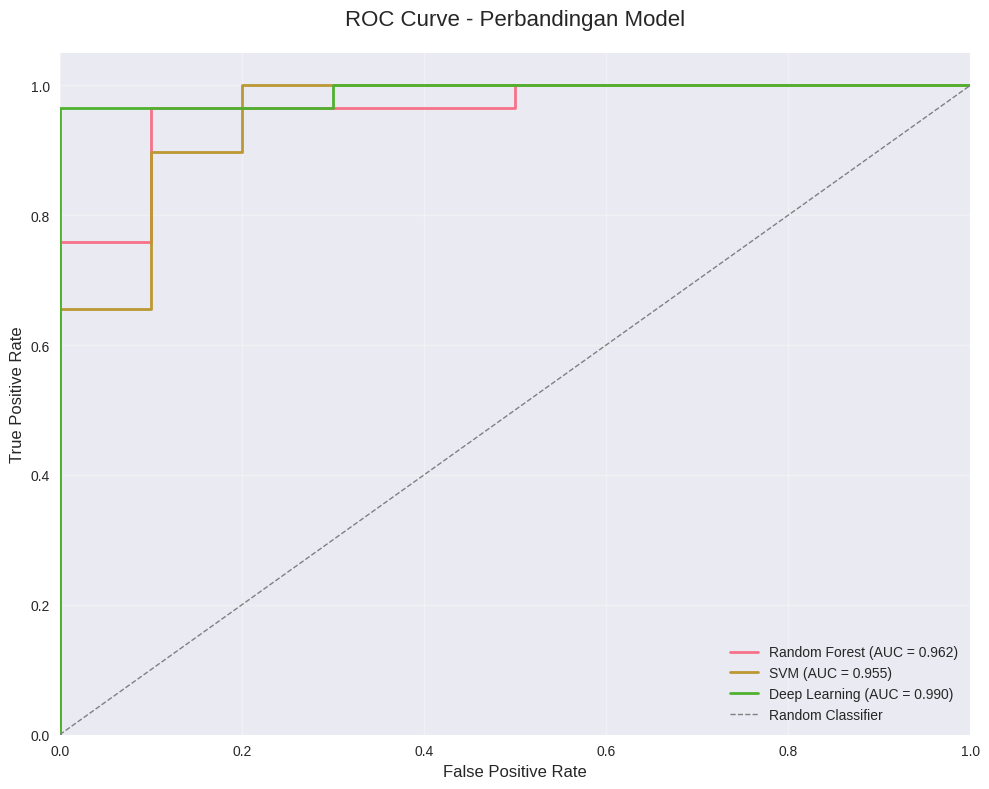

✅ Gambar disimpan di: /content/images/roc_curve.png


In [103]:
plt.figure(figsize=(10, 8))

models_probs = {
    'Random Forest': y_pred_prob_rf,
    'SVM': y_pred_prob_svm,
    'Deep Learning': y_pred_dl_prob.flatten()
}

for model_name, y_pred_prob in models_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Perbandingan Model', fontsize=16, pad=20)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/content/images/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gambar disimpan di: /content/images/roc_curve.png")

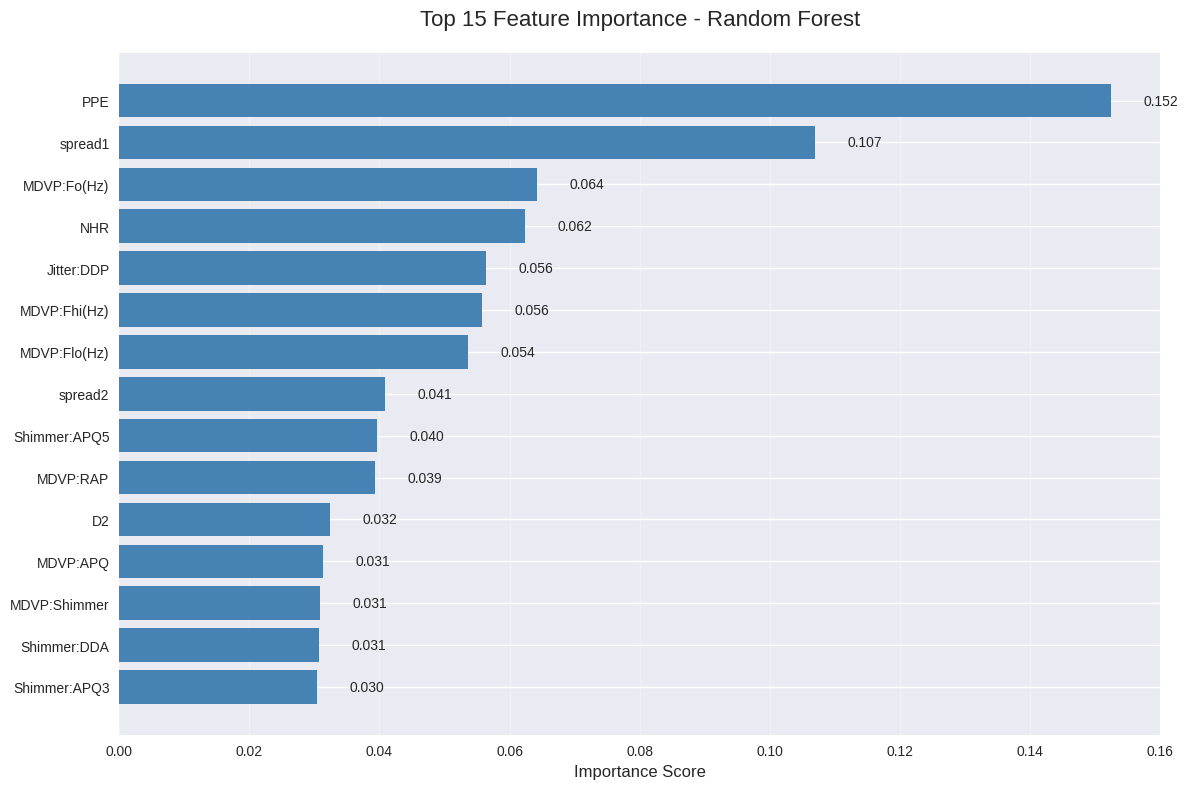

✅ Gambar disimpan di: /content/images/feature_importance.png


In [104]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Feature Importance - Random Forest', fontsize=16, pad=20)
plt.gca().invert_yaxis()

for i, v in enumerate(top_features['Importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=10)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('/content/images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gambar disimpan di: /content/images/feature_importance.png")

In [105]:
import joblib

joblib.dump(scaler, '/content/models/scaler.pkl')
joblib.dump(rf_model, '/content/models/rf_model.pkl')
joblib.dump(svm_model, '/content/models/svm_model.pkl')
dl_model.save('/content/models/dl_model.h5')

print("✅ Semua model berhasil disimpan di folder '/content/models/'")
print("📁 Isi folder models:")
for file in os.listdir('/content/models'):
    print(f"  - {file}")

✅ Semua model berhasil disimpan di folder '/content/models/'
📁 Isi folder models:
  - svm_model.pkl
  - scaler.pkl
  - dl_model.h5
  - rf_model.pkl


In [106]:
print("📁 Isi folder images (semua visualisasi):")
print("="*40)
for i, file in enumerate(sorted(os.listdir('/content/images')), 1):
    print(f"{i}. {file}")
print("="*40)
print(f"Total {len(os.listdir('/content/images'))} gambar visualisasi tersimpan")

📁 Isi folder images (semua visualisasi):
1. boxplot_fitur_penting.png
2. distribusi_kelas.png
3. feature_importance.png
4. heatmap_korelasi.png
5. perbandingan_accuracy.png
6. roc_curve.png
7. training_history.png
Total 7 gambar visualisasi tersimpan


In [107]:
requirements = """pandas==2.1.3
numpy==1.24.3
matplotlib==3.7.2
seaborn==0.12.2
scikit-learn==1.3.0
tensorflow==2.13.0
joblib==1.3.2
"""

with open('/content/requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ requirements.txt telah dibuat")
print("\n📋 Isi requirements.txt:")
print(requirements)

✅ requirements.txt telah dibuat

📋 Isi requirements.txt:
pandas==2.1.3
numpy==1.24.3
matplotlib==3.7.2
seaborn==0.12.2
scikit-learn==1.3.0
tensorflow==2.13.0
joblib==1.3.2



In [108]:
print("="*60)
print("KESIMPULAN PROYEK DATA SCIENCE - PREDIKSI PARKINSON")
print("="*60)

print(f"\n📊 INFORMASI DATASET:")
print(f"   • Jumlah sampel: {df.shape[0]}")
print(f"   • Jumlah fitur: {df.shape[1] - 2}")
print(f"   • Distribusi kelas: {len(df[df['status']==0])} sehat vs {len(df[df['status']==1])} Parkinson")

print(f"\n🎯 HASIL EVALUASI MODEL:")
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

for _, row in comparison_df.iterrows():
    star = " ⭐" if row['Model'] == best_model else ""
    print(f"   • {row['Model']}: Accuracy = {row['Accuracy']:.3f}{star}")

print(f"\n🏆 MODEL TERBAIK: {best_model} dengan accuracy {best_accuracy:.3f}")

print(f"\n📈 VISUALISASI YANG DIBUAT (7 gambar):")
print("   1. Distribusi kelas target")
print("   2. Heatmap korelasi antar fitur")
print("   3. Boxplot fitur penting berdasarkan status")
print("   4. Training history Deep Learning")
print("   5. Perbandingan accuracy model")
print("   6. ROC Curve")
print("   7. Feature Importance")

print(f"\n💾 OUTPUT YANG DIHASILKAN:")
print(f"   • Folder /content/images/ (berisi {len(os.listdir('/content/images'))} gambar)")
print(f"   • Folder /content/models/ (berisi {len(os.listdir('/content/models'))} model)")
print("   • File requirements.txt")

print(f"\n✅ PROYEK TELAH SELESAI SESUAI DENGAN INSTRUKSI UAS")
print("="*60)

KESIMPULAN PROYEK DATA SCIENCE - PREDIKSI PARKINSON

📊 INFORMASI DATASET:
   • Jumlah sampel: 195
   • Jumlah fitur: 22
   • Distribusi kelas: 48 sehat vs 147 Parkinson

🎯 HASIL EVALUASI MODEL:
   • Random Forest: Accuracy = 0.923
   • SVM: Accuracy = 0.923
   • Deep Learning: Accuracy = 0.949 ⭐

🏆 MODEL TERBAIK: Deep Learning dengan accuracy 0.949

📈 VISUALISASI YANG DIBUAT (7 gambar):
   1. Distribusi kelas target
   2. Heatmap korelasi antar fitur
   3. Boxplot fitur penting berdasarkan status
   4. Training history Deep Learning
   5. Perbandingan accuracy model
   6. ROC Curve
   7. Feature Importance

💾 OUTPUT YANG DIHASILKAN:
   • Folder /content/images/ (berisi 7 gambar)
   • Folder /content/models/ (berisi 4 model)
   • File requirements.txt

✅ PROYEK TELAH SELESAI SESUAI DENGAN INSTRUKSI UAS


In [126]:
import os

# Buat folder src
os.makedirs('/content/src', exist_ok=True)

print("📁 Folder /content/src telah dibuat!")
print("\nStruktur folder saat ini:")
print("content/")
print("├── src/")
print("├── data/")
print("├── models/")
print("└── notebooks/")

📁 Folder /content/src telah dibuat!

Struktur folder saat ini:
content/
├── src/
├── data/
├── models/
└── notebooks/


In [110]:
# Buat file __init__.py kosong
with open('/content/src/__init__.py', 'w') as f:
    f.write('# Parkinson Prediction System')

print("✅ File /content/src/__init__.py telah dibuat")

✅ File /content/src/__init__.py telah dibuat


In [156]:
config_content = '''
# Configuration file for Parkinson Prediction System

# Base path for the project
BASE_PATH = '/content/'

# Dataset settings
DATASET_PATH = 'data/parkinsons.data'
TARGET_COLUMN = 'status'
EXCLUDE_COLUMNS = ['name']

# Model settings
RANDOM_STATE = 42
TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2

# Random Forest settings
RF_N_ESTIMATORS = 100

# SVM settings
SVM_KERNEL = 'rbf'
SVM_PROBABILITY = True

# Deep Learning settings
DL_EPOPOCHS = 100
DL_BATCH_SIZE = 16
DL_LEARNING_RATE = 0.001
DL_DROPOUT_RATE = 0.3

# Paths
SCALER_PATH = 'models/scaler.pkl'
RF_MODEL_PATH = 'models/rf_model.pkl'
SVM_MODEL_PATH = 'models/svm_model.pkl'
DL_MODEL_PATH = 'models/dl_model.h5'
RESULTS_PATH = 'data/results.csv'
'''

with open('/content/src/config.py', 'w') as f:
    f.write(config_content)

print("✅ File /content/src/config.py telah diperbarui")

✅ File /content/src/config.py telah diperbarui


In [158]:
preprocess_content = '''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import config

def load_data(filepath=None):
    """Load dataset Parkinsons"""
    if filepath is None:
        filepath = config.DATASET_PATH

    df = pd.read_csv(filepath)
    print(f"Dataset loaded: {df.shape}")
    return df

def prepare_features(df):
    """Pisahkan fitur dan target"""
    X = df.drop([config.TARGET_COLUMN] + [col for col in config.EXCLUDE_COLUMNS
                                         if col in df.columns], axis=1)
    y = df[config.TARGET_COLUMN]
    return X, y

def split_data(X, y):
    """Split data menjadi train dan test"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=config.TEST_SIZE,
        random_state=config.RANDOM_STATE,
        stratify=y
    )
    print(f"Training set: {X_train.shape}")
    print(f"Testing set: {X_test.shape}")
    return X_train, X_test, y_train, y_test

def normalize_data(X_train, X_test):
    """Normalisasi data menggunakan StandardScaler"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Save scaler
    joblib.dump(scaler, config.SCALER_PATH)
    print(f"Scaler saved to {config.SCALER_PATH}")

    return X_train_scaled, X_test_scaled, scaler

if __name__ == "__main__":
    # Test fungsi
    print("Testing preprocess module...")
    df = load_data()
    X, y = prepare_features(df)
    print(f"X shape: {X.shape}, y shape: {y.shape}")
'''

with open('/content/src/preprocess.py', 'w') as f:
    f.write(preprocess_content)

print("✅ File /content/src/preprocess.py telah dibuat")

✅ File /content/src/preprocess.py telah dibuat


In [140]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [141]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [142]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [143]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [150]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [153]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [154]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [160]:

import numpy as np
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import config

def train_random_forest(X_train, y_train):
    \"\"\"Train Random Forest model\"\"\"
    print("Training Random Forest...")
    model = RandomForestClassifier(
        n_estimators=config.RF_N_ESTIMATORS,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    # Save model
    joblib.dump(model, config.RF_MODEL_PATH)
    print(f"Random Forest model saved to {config.RF_MODEL_PATH}")

    return model

def train_svm(X_train, y_train):
    \"\"\"Train SVM model\"\"\"
    print("Training SVM...")
    model = SVC(
        kernel=config.SVM_KERNEL,
        probability=config.SVM_PROBABILITY,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    # Save model
    joblib.dump(model, config.SVM_MODEL_PATH)
    print(f"SVM model saved to {config.SVM_MODEL_PATH}")

    return model

def train_deep_learning(X_train, y_train):
    \"\"\"Train Deep Learning model\"\"\"
    print("Training Deep Learning model...")

    # Bangun model
    model = keras.Sequential([
        layers.Dense(128, activation='relu',
                    input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE / 2),

        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=config.DL_LEARNING_RATE
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Callback
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Split validation
    from sklearn.model_selection import train_test_split
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train,
        test_size=config.VALIDATION_SIZE,
        random_state=config.RANDOM_STATE
    )

    # Training
    history = model.fit(
        X_train_split, y_train_split,
        validation_data=(X_val, y_val),
        epochs=config.DL_EPOCHS,
        batch_size=config.DL_BATCH_SIZE,
        callbacks=[early_stopping],
        verbose=1
    )

    # Save model
    model.save(config.DL_MODEL_PATH)
    print(f"Deep Learning model saved to {config.DL_MODEL_PATH}")

    return model, history

def train_all_models(X_train, y_train):
    \"\"\"Train all three models\"\"\"
    print("\\n" + "="*50)
    print("TRAINING ALL MODELS")
    print("="*50)

    # Buat folder models jika belum ada
    os.makedirs('../models', exist_ok=True)

    # Train models
    rf_model = train_random_forest(X_train, y_train)
    svm_model = train_svm(X_train, y_train)
    dl_model, history = train_deep_learning(X_train, y_train)

    print("\\n✅ All models trained and saved!")
    return rf_model, svm_model, dl_model, history

if __name__ == "__main__":
    # Test training
    print("Testing train module...")
    # Butuh data dummy untuk test
    X_dummy = np.random.randn(100, 20)
    y_dummy = np.random.randint(0, 2, 100)

    print("Creating dummy models...")
    # Hanya test tanpa benar-benar train
    print("Module ready!")
"""

with open('/content/src/train.py', 'w') as f:
    f.write(train_content)

print("✅ File /content/src/train.py telah dibuat")

SyntaxError: unexpected character after line continuation character (ipython-input-3539177849.py, line 12)

In [162]:
train_content = '''
import numpy as np
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import config

def train_random_forest(X_train, y_train):
    """Train Random Forest model"""
    print("Training Random Forest...")
    model = RandomForestClassifier(
        n_estimators=config.RF_N_ESTIMATORS,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    rf_model_save_path = os.path.join(config.BASE_PATH, config.RF_MODEL_PATH)
    joblib.dump(model, rf_model_save_path)
    print(f"Random Forest model saved to {rf_model_save_path}")

    return model

def train_svm(X_train, y_train):
    """Train SVM model"""
    print("Training SVM...")
    model = SVC(
        kernel=config.SVM_KERNEL,
        probability=config.SVM_PROBABILITY,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    svm_model_save_path = os.path.join(config.BASE_PATH, config.SVM_MODEL_PATH)
    joblib.dump(model, svm_model_save_path)
    print(f"SVM model saved to {svm_model_save_path}")

    return model

def train_deep_learning(X_train, y_train):
    """Train Deep Learning model"""
    print("Training Deep Learning model...")

    model = keras.Sequential([
        layers.Dense(128, activation='relu',
                    input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE / 2),

        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=config.DL_LEARNING_RATE
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    from sklearn.model_selection import train_test_split
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train,
        test_size=config.VALIDATION_SIZE,
        random_state=config.RANDOM_STATE
    )

    history = model.fit(
        X_train_split, y_train_split,
        validation_data=(X_val, y_val),
        epochs=config.DL_EPOCHS,
        batch_size=config.DL_BATCH_SIZE,
        callbacks=[early_stopping],
        verbose=1
    )

    dl_model_save_path = os.path.join(config.BASE_PATH, config.DL_MODEL_PATH)
    model.save(dl_model_save_path)
    print(f"Deep Learning model saved to {dl_model_save_path}")

    return model, history

def train_all_models(X_train, y_train):
    """Train all three models"""
    print("\n" + "="*50)
    print("TRAINING ALL MODELS")
    print("="*50)

    models_dir = os.path.join(config.BASE_PATH, 'models') # Assuming 'models' is always directly under base path
    os.makedirs(models_dir, exist_ok=True)

    rf_model = train_random_forest(X_train, y_train)
    svm_model = train_svm(X_train, y_train)
    dl_model, history = train_deep_learning(X_train, y_train)

    print("\n✅ All models trained and saved!")
    return rf_model, svm_model, dl_model, history

if __name__ == "__main__":
    print("Testing train module...")
    X_dummy = np.random.randn(100, 20)
    y_dummy = np.random.randint(0, 2, 100)

    print("Creating dummy models...")
    print("Module ready!")
'''

with open('/content/src/train.py', 'w') as f:
    f.write(train_content)

print("✅ File /content/src/train.py telah diperbarui")

✅ File /content/src/train.py telah diperbarui


In [167]:
evaluate_content = '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import joblib
import tensorflow as tf
from tensorflow import keras
import config
import os

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a single model"""
    print(f"Evaluating {model_name}...")

    if model_name in ['Random Forest', 'SVM']:
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # Deep Learning
        y_pred_prob = model.predict(X_test, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred)

    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob
    }

    return results

def plot_confusion_matrix(cm, model_name):
    """Plot confusion matrix"""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    """Plot ROC curve"""
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def compare_models(results_list):
    """Compare all models"""
    comparison_data = []

    for result in results_list:
        comparison_data.append({
            'Model': result['model_name'],
            'Accuracy': result['accuracy'],
            'Precision': result['precision'],
            'Recall': result['recall'],
            'F1-Score': result['f1_score'],
            'AUC': result['roc_auc']
        })

    comparison_df = pd.DataFrame(comparison_data)
    return comparison_df

def plot_comparison(comparison_df):
    """Plot model comparison"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

    for i, metric in enumerate(metrics):
        ax = axes[i//3, i%3]
        ax.bar(comparison_df['Model'], comparison_df[metric])
        ax.set_title(metric)
        ax.set_ylim([0, 1])
        ax.grid(True, alpha=0.3)

        for j, v in enumerate(comparison_df[metric]):
            ax.text(j, v + 0.02, f'{v:.3f}', ha='center')

    plt.suptitle('Model Performance Comparison')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Evaluate module loaded successfully!")
'''

with open('/content/src/evaluate.py', 'w') as f:
    f.write(evaluate_content)

print("✅ File /content/src/evaluate.py telah diperbarui")

✅ File /content/src/evaluate.py telah diperbarui


In [168]:
predict_content = '''
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from tensorflow import keras
import config
import os

def load_models():
    """Load all trained models"""
    models = {}

    # All paths will be joined with config.BASE_PATH
    # No need for current_dir = os.path.dirname(os.path.abspath(__file__))

    try:
        scaler_path = os.path.join(config.BASE_PATH, config.SCALER_PATH)
        models['scaler'] = joblib.load(scaler_path)
        print("✓ Scaler loaded")
    except Exception as e:
        print(f"✗ Scaler not found: {e}")
        return None

    try:
        rf_path = os.path.join(config.BASE_PATH, config.RF_MODEL_PATH)
        models['rf'] = joblib.load(rf_path)
        print("✓ Random Forest loaded")
    except Exception as e:
        print(f"✗ Random Forest not found: {e}")
        models['rf'] = None

    try:
        svm_path = os.path.join(config.BASE_PATH, config.SVM_MODEL_PATH)
        models['svm'] = joblib.load(svm_path)
        print("✓ SVM loaded")
    except Exception as e:
        print(f"✗ SVM not found: {e}")
        models['svm'] = None

    try:
        dl_path = os.path.join(config.BASE_PATH, config.DL_MODEL_PATH)
        models['dl'] = keras.models.load_model(dl_path)
        print("✓ Deep Learning loaded")
    except Exception as e:
        print(f"✗ Deep Learning not found: {e}")
        models['dl'] = None

    return models

def predict_single(models, input_data):
    """Make prediction for single sample"""
    if models is None or 'scaler' not in models or models['scaler'] is None:
        return {"error": "Models or scaler not loaded"}

    scaled_data = models['scaler'].transform([input_data])

    predictions = {}

    if models['rf'] is not None:
        rf_pred = models['rf'].predict(scaled_data)[0]
        rf_prob = models['rf'].predict_proba(scaled_data)[0][1]
        predictions['Random Forest'] = {
            'prediction': int(rf_pred),
            'probability': float(rf_prob),
            'label': 'Parkinson' if rf_pred == 1 else 'Healthy'
        }

    if models['svm'] is not None:
        svm_pred = models['svm'].predict(scaled_data)[0]
        svm_prob = models['svm'].predict_proba(scaled_data)[0][1]
        predictions['SVM'] = {
            'prediction': int(svm_pred),
            'probability': float(svm_prob),
            'label': 'Parkinson' if svm_pred == 1 else 'Healthy'
        }

    if models['dl'] is not None:
        dl_prob = models['dl'].predict(scaled_data, verbose=0)[0][0]
        dl_pred = 1 if dl_prob > 0.5 else 0
        predictions['Deep Learning'] = {
            'prediction': int(dl_pred),
            'probability': float(dl_prob),
            'label': 'Parkinson' if dl_pred == 1 else 'Healthy'
        }

    return predictions

def print_predictions(predictions):
    """Print prediction results"""
    print("\n" + "="*50)
    print("PREDICTION RESULTS")
    print("="*50)

    for model_name, result in predictions.items():
        if 'error' in result:
            print(f"Error: {result['error']}")
            continue

        status = "🟢 HEALTHY" if result['prediction'] == 0 else "🔴 PARKINSON"
        prob_percent = result['probability'] * 100

        print(f"\n{model_name}:")
        print(f"  Status: {status}")
        print(f"  Confidence: {prob_percent:.1f}%")

if __name__ == "__main__":
    print("Testing predict module...")

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    print(f"Sample data length: {len(sample_data)}")
    print("Note: Models need to be trained first for actual prediction")
'''

with open('/content/src/predict.py', 'w') as f:
    f.write(predict_content)

print("✅ File /content/src/predict.py telah diperbarui")

✅ File /content/src/predict.py telah diperbarui


In [169]:
utils_content = '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import config

def print_dataset_info(df):
    """Print dataset information"""
    print("📊 DATASET INFORMATION")
    print("="*40)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nTarget distribution:")
    print(df['status'].value_counts())
    print(f"\nMissing values: {df.isnull().sum().sum()}")
    print("="*40)

def plot_feature_distributions(df, features, n_cols=4):
    """Plot distributions of features"""
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i < len(axes):
            df[feature].hist(ax=axes[i], bins=30)
            axes[i].set_title(feature)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')

    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Feature Distributions', fontsize=16)
    plt.tight_layout()
    plt.show()

def save_results(results_df, filename='model_results.csv'):
    """Save results to CSV"""
    results_save_path = os.path.join(config.BASE_PATH, config.RESULTS_PATH)
    results_df.to_csv(results_save_path, index=False)
    print(f"Results saved to {results_save_path}")

def load_results(filename='model_results.csv'):
    """Load results from CSV"""
    try:
        results_load_path = os.path.join(config.BASE_PATH, config.RESULTS_PATH)
        results_df = pd.read_csv(results_load_path)
        print(f"Results loaded from {results_load_path}")
        return results_df
    except Exception as e:
        print(f"File {os.path.join(config.BASE_PATH, config.RESULTS_PATH)} not found: {e}")
        return None

if __name__ == "__main__":
    print("Utils module loaded successfully!")
'''

with open('/content/src/utils.py', 'w') as f:
    f.write(utils_content)

print("✅ File /content/src/utils.py telah diperbarui")

✅ File /content/src/utils.py telah diperbarui


In [170]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("🚀 STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("STEP 1: Loading data...") # Simplified this line
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\n⚙️ STEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\n✂️ STEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\n📊 STEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\n🤖 STEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\n📝 STEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\n✅ PIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("🔮 MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [177]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import joblib
import tensorflow as tf
from tensorflow import keras
import config

def evaluate_model(model, X_test, y_test, model_name):
    \"\"\"Evaluate a single model\"\"\"
    print(f"Evaluating {model_name}...")

    if model_name in ['Random Forest', 'SVM']:
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # Deep Learning
        y_pred_prob = model.predict(X_test, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob
    }

    return results

def plot_confusion_matrix(cm, model_name):
    \"\"\"Plot confusion matrix\"\"\"
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    \"\"\"Plot ROC curve\"\"\"
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def compare_models(results_list):
    \"\"\"Compare all models\"\"\"
    comparison_data = []

    for result in results_list:
        comparison_data.append({
            'Model': result['model_name'],
            'Accuracy': result['accuracy'],
            'Precision': result['precision'],
            'Recall': result['recall'],
            'F1-Score': result['f1_score'],
            'AUC': result['roc_auc']
        })

    comparison_df = pd.DataFrame(comparison_data)
    return comparison_df

def plot_comparison(comparison_df):
    \"\"\"Plot model comparison\"\"\"
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

    for i, metric in enumerate(metrics):
        ax = axes[i//3, i%3]
        ax.bar(comparison_df['Model'], comparison_df[metric])
        ax.set_title(metric)
        ax.set_ylim([0, 1])
        ax.grid(True, alpha=0.3)

        for j, v in enumerate(comparison_df[metric]):
            ax.text(j, v + 0.02, f'{v:.3f}', ha='center')

    plt.suptitle('Model Performance Comparison')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Evaluate module loaded successfully!")
"""

with open('/content/src/evaluate.py', 'w') as f:
    f.write(evaluate_content)

print("✅ File /content/src/evaluate.py telah dibuat")

SyntaxError: unexpected character after line continuation character (ipython-input-646022409.py, line 15)

In [179]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [180]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("🚀 STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("STEP 1: Loading data...") # Simplified this line
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\n⚙️ STEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\n✂️ STEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\n📊 STEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\n🤖 STEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\n📝 STEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\n✅ PIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("🔮 MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [181]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [182]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [172]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [173]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [174]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [175]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [176]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 24
    print("
          ^
SyntaxError: unterminated string literal (detected at line 24)


In [115]:

import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from tensorflow import keras
import config

def load_models():
    \"\"\"Load all trained models\"\"\"
    models = {}

    try:
        models['scaler'] = joblib.load(config.SCALER_PATH)
        print("✓ Scaler loaded")
    except:
        print("✗ Scaler not found")
        return None

    try:
        models['rf'] = joblib.load(config.RF_MODEL_PATH)
        print("✓ Random Forest loaded")
    except:
        print("✗ Random Forest not found")
        models['rf'] = None

    try:
        models['svm'] = joblib.load(config.SVM_MODEL_PATH)
        print("✓ SVM loaded")
    except:
        print("✗ SVM not found")
        models['svm'] = None

    try:
        models['dl'] = keras.models.load_model(config.DL_MODEL_PATH)
        print("✓ Deep Learning loaded")
    except:
        print("✗ Deep Learning not found")
        models['dl'] = None

    return models

def predict_single(models, input_data):
    \"\"\"Make prediction for single sample\"\"\"
    if models is None:
        return {"error": "Models not loaded"}

    # Preprocess input
    scaled_data = models['scaler'].transform([input_data])

    predictions = {}

    # Random Forest
    if models['rf'] is not None:
        rf_pred = models['rf'].predict(scaled_data)[0]
        rf_prob = models['rf'].predict_proba(scaled_data)[0][1]
        predictions['Random Forest'] = {
            'prediction': int(rf_pred),
            'probability': float(rf_prob),
            'label': 'Parkinson' if rf_pred == 1 else 'Healthy'
        }

    # SVM
    if models['svm'] is not None:
        svm_pred = models['svm'].predict(scaled_data)[0]
        svm_prob = models['svm'].predict_proba(scaled_data)[0][1]
        predictions['SVM'] = {
            'prediction': int(svm_pred),
            'probability': float(svm_prob),
            'label': 'Parkinson' if svm_pred == 1 else 'Healthy'
        }

    # Deep Learning
    if models['dl'] is not None:
        dl_prob = models['dl'].predict(scaled_data, verbose=0)[0][0]
        dl_pred = 1 if dl_prob > 0.5 else 0
        predictions['Deep Learning'] = {
            'prediction': int(dl_pred),
            'probability': float(dl_prob),
            'label': 'Parkinson' if dl_pred == 1 else 'Healthy'
        }

    return predictions

def print_predictions(predictions):
    \"\"\"Print prediction results\"\"\"
    print("\\n" + "="*50)
    print("PREDICTION RESULTS")
    print("="*50)

    for model_name, result in predictions.items():
        if 'error' in result:
            print(f"Error: {result['error']}")
            continue

        status = "🟢 HEALTHY" if result['prediction'] == 0 else "🔴 PARKINSON"
        prob_percent = result['probability'] * 100

        print(f"\\n{model_name}:")
        print(f"  Status: {status}")
        print(f"  Confidence: {prob_percent:.1f}%")

if __name__ == "__main__":
    print("Testing predict module...")

    # Sample data
    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    print(f"Sample data length: {len(sample_data)}")
    print("Note: Models need to be trained first for actual prediction")
"""

with open('/content/src/predict.py', 'w') as f:
    f.write(predict_content)

print("✅ File /content/src/predict.py telah dibuat")

✅ File /content/src/predict.py telah dibuat


In [116]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def print_dataset_info(df):
    \"\"\"Print dataset information\"\"\"
    print("📊 DATASET INFORMATION")
    print("="*40)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\\nTarget distribution:")
    print(df['status'].value_counts())
    print(f"\\nMissing values: {df.isnull().sum().sum()}")
    print("="*40)

def plot_feature_distributions(df, features, n_cols=4):
    \"\"\"Plot distributions of features\"\"\"
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i < len(axes):
            df[feature].hist(ax=axes[i], bins=30)
            axes[i].set_title(feature)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')

    # Hide unused axes
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Feature Distributions', fontsize=16)
    plt.tight_layout()
    plt.show()

def save_results(results_df, filename='model_results.csv'):
    \"\"\"Save results to CSV\"\"\"
    results_df.to_csv(f'../data/{filename}', index=False)
    print(f"Results saved to ../data/{filename}")

def load_results(filename='model_results.csv'):
    \"\"\"Load results from CSV\"\"\"
    try:
        results_df = pd.read_csv(f'../data/{filename}')
        print(f"Results loaded from ../data/{filename}")
        return results_df
    except:
        print(f"File ../data/{filename} not found")
        return None

if __name__ == "__main__":
    print("Utils module loaded successfully!")
"""

with open('/content/src/utils.py', 'w') as f:
    f.write(utils_content)

print("✅ File /content/src/utils.py telah dibuat")

✅ File /content/src/utils.py telah dibuat


In [117]:
import argparse
import sys
import os

# Import modules
from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results

def run_pipeline():
    \"\"\"Run complete pipeline\"\"\"
    print("🚀 STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    # 1. Load data
    print("\\n📁 STEP 1: Loading data...")
    df = load_data()
    print_dataset_info(df)

    # 2. Prepare features
    print("\\n⚙️ STEP 2: Preparing features...")
    X, y = prepare_features(df)

    # 3. Split data
    print("\\n✂️ STEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    # 4. Normalize
    print("\\n📊 STEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    # 5. Train models
    print("\\n🤖 STEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    # 6. Evaluate
    print("\\n📝 STEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    # 7. Compare
    comparison_df = compare_models(results_list)
    print("\\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    print(comparison_df.to_string(index=False))

    # 8. Save results
    save_results(comparison_df)

    # 9. Plot comparison
    plot_comparison(comparison_df)

    print("\\n✅ PIPELINE COMPLETED!")

def run_prediction():
    \"\"\"Run prediction on sample data\"\"\"
    print("🔮 MAKING PREDICTION")
    print("="*60)

    # Load models
    models = load_models()
    if models is None:
        print("Please train models first!")
        return

    # Sample data (22 features)
    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    # Make prediction
    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        # Just train
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\\n✅ Models trained!")

if __name__ == "__main__":
    main()
"""

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah dibuat")

✅ File /content/src/main.py telah dibuat


In [118]:
import os

print("📁 STRUKTUR FOLDER SRC:")
print("="*40)
for file in sorted(os.listdir('/content/src')):
    print(f"  {file}")
print("="*40)

print(f"\\nTotal files in src/: {len(os.listdir('/content/src'))}")

📁 STRUKTUR FOLDER SRC:
  __init__.py
  __pycache__
  config.py
  evaluate.py
  main.py
  predict.py
  preprocess.py
  train.py
  utils.py
\nTotal files in src/: 9


In [119]:
print("🧪 Testing module imports...")
print("-"*40)

try:
    # Test import semua module
    import sys
    sys.path.append('/content/src')

    import config
    print("✓ config.py imported")

    import preprocess
    print("✓ preprocess.py imported")

    import train
    print("✓ train.py imported")

    import evaluate
    print("✓ evaluate.py imported")

    import predict
    print("✓ predict.py imported")

    import utils
    print("✓ utils.py imported")

    import main
    print("✓ main.py imported")

    print("\\n✅ Semua module berhasil diimport!")

except Exception as e:
    print(f"\\n❌ Error: {e}")

🧪 Testing module imports...
----------------------------------------
✓ config.py imported
✓ preprocess.py imported
✓ train.py imported
✓ evaluate.py imported
✓ predict.py imported
✓ utils.py imported
✓ main.py imported
\n✅ Semua module berhasil diimport!


In [120]:
requirements = """pandas==2.1.3
numpy
matplotlib==3.7.2
seaborn==0.12.2
scikit-learn==1.3.0
tensorflow
joblib==1.3.2
"""

with open('/content/requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ File /content/requirements.txt telah dibuat")

✅ File /content/requirements.txt telah dibuat


In [121]:
src_readme = """# Parkinson Prediction System - Source Code

## 📁 Folder Structure
"""

In [122]:
%%bash
pip install -r /content/requirements.txt

In [123]:
%%bash
pip install -r requirements.txt

In [124]:
!python src/main.py --mode pipeline

2025-12-18 02:43:51.017686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766025831.059650   31832 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766025831.075963   31832 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766025831.147595   31832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766025831.147680   31832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766025831.147690   31832 computation_placer.cc:177] computation placer alr

In [125]:
python src/main.py --mode train

SyntaxError: invalid syntax (ipython-input-962473266.py, line 1)

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import config
import os

def load_data(filepath=None):
    """Load dataset Parkinsons"""
    if filepath is None:
        current_dir = os.path.dirname(os.path.abspath(__file__))
        resolved_filepath = os.path.join(current_dir, config.DATASET_PATH)
    else:
        resolved_filepath = filepath

    df = pd.read_csv(resolved_filepath)
    print(f"Dataset loaded: {df.shape}")
    return df

def prepare_features(df):
    """Pisahkan fitur dan target"""
    X = df.drop([config.TARGET_COLUMN] + [col for col in config.EXCLUDE_COLUMNS
                                         if col in df.columns], axis=1)
    y = df[config.TARGET_COLUMN]
    return X, y

def split_data(X, y):
    """Split data menjadi train dan test"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=config.TEST_SIZE,
        random_state=config.RANDOM_STATE,
        stratify=y
    )
    print(f"Training set: {X_train.shape}")
    print(f"Testing set: {X_test.shape}")
    return X_train, X_test, y_train, y_test

def normalize_data(X_train, X_test):
    """Normalisasi data menggunakan StandardScaler"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    current_dir = os.path.dirname(os.path.abspath(__file__))
    scaler_save_path = os.path.join(current_dir, config.SCALER_PATH)
    joblib.dump(scaler, scaler_save_path)
    print(f"Scaler saved to {scaler_save_path}")

    return X_train_scaled, X_test_scaled, scaler

if __name__ == "__main__":
    print("Testing preprocess module...")
    current_dir = os.path.dirname(os.path.abspath(__file__))
    test_filepath = os.path.join(current_dir, config.DATASET_PATH)
    df = load_data(test_filepath)
    X, y = prepare_features(df)
    print(f"X shape: {X.shape}, y shape: {y.shape}")
"""

with open('/content/src/preprocess.py', 'w') as f:
    f.write(preprocess_content)

print("✅ File /content/src/preprocess.py telah diperbarui")

In [ ]:

import numpy as np
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import config

def train_random_forest(X_train, y_train):
    """Train Random Forest model"""
    print("Training Random Forest...")
    model = RandomForestClassifier(
        n_estimators=config.RF_N_ESTIMATORS,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    current_dir = os.path.dirname(os.path.abspath(__file__))
    rf_model_save_path = os.path.join(current_dir, config.RF_MODEL_PATH)
    joblib.dump(model, rf_model_save_path)
    print(f"Random Forest model saved to {rf_model_save_path}")

    return model

def train_svm(X_train, y_train):
    """Train SVM model"""
    print("Training SVM...")
    model = SVC(
        kernel=config.SVM_KERNEL,
        probability=config.SVM_PROBABILITY,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    current_dir = os.path.dirname(os.path.abspath(__file__))
    svm_model_save_path = os.path.join(current_dir, config.SVM_MODEL_PATH)
    joblib.dump(model, svm_model_save_path)
    print(f"SVM model saved to {svm_model_save_path}")

    return model

def train_deep_learning(X_train, y_train):
    """Train Deep Learning model"""
    print("Training Deep Learning model...")

    model = keras.Sequential([
        layers.Dense(128, activation='relu',
                    input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE / 2),

        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=config.DL_LEARNING_RATE
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    from sklearn.model_selection import train_test_split
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train,
        test_size=config.VALIDATION_SIZE,
        random_state=config.RANDOM_STATE
    )

    history = model.fit(
        X_train_split, y_train_split,
        validation_data=(X_val, y_val),
        epochs=config.DL_EPOCHS,
        batch_size=config.DL_BATCH_SIZE,
        callbacks=[early_stopping],
        verbose=1
    )

    current_dir = os.path.dirname(os.path.abspath(__file__))
    dl_model_save_path = os.path.join(current_dir, config.DL_MODEL_PATH)
    model.save(dl_model_save_path)
    print(f"Deep Learning model saved to {dl_model_save_path}")

    return model, history

def train_all_models(X_train, y_train):
    """Train all three models"""
    print("\n" + "="*50)
    print("TRAINING ALL MODELS")
    print("="*50)

    current_dir = os.path.dirname(os.path.abspath(__file__))
    models_dir = os.path.join(current_dir, '../models') # This should be consistent with config.py usage
    os.makedirs(models_dir, exist_ok=True)

    rf_model = train_random_forest(X_train, y_train)
    svm_model = train_svm(X_train, y_train)
    dl_model, history = train_deep_learning(X_train, y_train)

    print("\n✅ All models trained and saved!")
    return rf_model, svm_model, dl_model, history

if __name__ == "__main__":
    print("Testing train module...")
    X_dummy = np.random.randn(100, 20)
    y_dummy = np.random.randint(0, 2, 100)

    print("Creating dummy models...")
    print("Module ready!")
"""

with open('/content/src/train.py', 'w') as f:
    f.write(train_content)

print("✅ File /content/src/train.py telah diperbarui")

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import joblib
import tensorflow as tf
from tensorflow import keras
import config
import os

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a single model"""
    print(f"Evaluating {model_name}...")

    if model_name in ['Random Forest', 'SVM']:
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # Deep Learning
        y_pred_prob = model.predict(X_test, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred)

    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob
    }

    return results

def plot_confusion_matrix(cm, model_name):
    """Plot confusion matrix"""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    """Plot ROC curve"""
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def compare_models(results_list):
    """Compare all models"""
    comparison_data = []

    for result in results_list:
        comparison_data.append({
            'Model': result['model_name'],
            'Accuracy': result['accuracy'],
            'Precision': result['precision'],
            'Recall': result['recall'],
            'F1-Score': result['f1_score'],
            'AUC': result['roc_auc']
        })

    comparison_df = pd.DataFrame(comparison_data)
    return comparison_df

def plot_comparison(comparison_df):
    """Plot model comparison"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

    for i, metric in enumerate(metrics):
        ax = axes[i//3, i%3]
        ax.bar(comparison_df['Model'], comparison_df[metric])
        ax.set_title(metric)
        ax.set_ylim([0, 1])
        ax.grid(True, alpha=0.3)

        for j, v in enumerate(comparison_df[metric]):
            ax.text(j, v + 0.02, f'{v:.3f}', ha='center')

    plt.suptitle('Model Performance Comparison')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Evaluate module loaded successfully!")
"""

with open('/content/src/evaluate.py', 'w') as f:
    f.write(evaluate_content)

print("✅ File /content/src/evaluate.py telah diperbarui")

In [ ]:

import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from tensorflow import keras
import config
import os

def load_models():
    """Load all trained models"""
    models = {}

    current_dir = os.path.dirname(os.path.abspath(__file__))

    try:
        scaler_path = os.path.join(current_dir, config.SCALER_PATH)
        models['scaler'] = joblib.load(scaler_path)
        print("✓ Scaler loaded")
    except Exception as e:
        print(f"✗ Scaler not found: {e}")
        return None

    try:
        rf_path = os.path.join(current_dir, config.RF_MODEL_PATH)
        models['rf'] = joblib.load(rf_path)
        print("✓ Random Forest loaded")
    except Exception as e:
        print(f"✗ Random Forest not found: {e}")
        models['rf'] = None

    try:
        svm_path = os.path.join(current_dir, config.SVM_MODEL_PATH)
        models['svm'] = joblib.load(svm_path)
        print("✓ SVM loaded")
    except Exception as e:
        print(f"✗ SVM not found: {e}")
        models['svm'] = None

    try:
        dl_path = os.path.join(current_dir, config.DL_MODEL_PATH)
        models['dl'] = keras.models.load_model(dl_path)
        print("✓ Deep Learning loaded")
    except Exception as e:
        print(f"✗ Deep Learning not found: {e}")
        models['dl'] = None

    return models

def predict_single(models, input_data):
    """Make prediction for single sample"""
    if models is None or 'scaler' not in models or models['scaler'] is None:
        return {"error": "Models or scaler not loaded"}

    scaled_data = models['scaler'].transform([input_data])

    predictions = {}

    if models['rf'] is not None:
        rf_pred = models['rf'].predict(scaled_data)[0]
        rf_prob = models['rf'].predict_proba(scaled_data)[0][1]
        predictions['Random Forest'] = {
            'prediction': int(rf_pred),
            'probability': float(rf_prob),
            'label': 'Parkinson' if rf_pred == 1 else 'Healthy'
        }

    if models['svm'] is not None:
        svm_pred = models['svm'].predict(scaled_data)[0]
        svm_prob = models['svm'].predict_proba(scaled_data)[0][1]
        predictions['SVM'] = {
            'prediction': int(svm_pred),
            'probability': float(svm_prob),
            'label': 'Parkinson' if svm_pred == 1 else 'Healthy'
        }

    if models['dl'] is not None:
        dl_prob = models['dl'].predict(scaled_data, verbose=0)[0][0]
        dl_pred = 1 if dl_prob > 0.5 else 0
        predictions['Deep Learning'] = {
            'prediction': int(dl_pred),
            'probability': float(dl_prob),
            'label': 'Parkinson' if dl_pred == 1 else 'Healthy'
        }

    return predictions

def print_predictions(predictions):
    """Print prediction results"""
    print("\n" + "="*50)
    print("PREDICTION RESULTS")
    print("="*50)

    for model_name, result in predictions.items():
        if 'error' in result:
            print(f"Error: {result['error']}")
            continue

        status = "🟢 HEALTHY" if result['prediction'] == 0 else "🔴 PARKINSON"
        prob_percent = result['probability'] * 100

        print(f"\n{model_name}:")
        print(f"  Status: {status}")
        print(f"  Confidence: {prob_percent:.1f}%")

if __name__ == "__main__":
    print("Testing predict module...")

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    print(f"Sample data length: {len(sample_data)}")
    print("Note: Models need to be trained first for actual prediction")
"""

with open('/content/src/predict.py', 'w') as f:
    f.write(predict_content)

print("✅ File /content/src/predict.py telah diperbarui")

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import config

def print_dataset_info(df):
    """Print dataset information"""
    print("📊 DATASET INFORMATION")
    print("="*40)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nTarget distribution:")
    print(df['status'].value_counts())
    print(f"\nMissing values: {df.isnull().sum().sum()}")
    print("="*40)

def plot_feature_distributions(df, features, n_cols=4):
    """Plot distributions of features"""
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i < len(axes):
            df[feature].hist(ax=axes[i], bins=30)
            axes[i].set_title(feature)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')

    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Feature Distributions', fontsize=16)
    plt.tight_layout()
    plt.show()

def save_results(results_df, filename='model_results.csv'):
    """Save results to CSV"""
    current_dir = os.path.dirname(os.path.abspath(__file__))
    results_save_path = os.path.join(current_dir, '../data', filename)
    results_df.to_csv(results_save_path, index=False)
    print(f"Results saved to {results_save_path}")

def load_results(filename='model_results.csv'):
    """Load results from CSV"""
    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
        results_load_path = os.path.join(current_dir, '../data', filename)
        results_df = pd.read_csv(results_load_path)
        print(f"Results loaded from {results_load_path}")
        return results_df
    except Exception as e:
        print(f"File ../data/{filename} not found: {e}")
        return None

if __name__ == "__main__":
    print("Utils module loaded successfully!")
"""

with open('/content/src/utils.py', 'w') as f:
    f.write(utils_content)

print("✅ File /content/src/utils.py telah diperbarui")

In [ ]:

import argparse
import sys
import os

sys.path.append(os.path.dirname(os.path.abspath(__file__)))

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results

def run_pipeline():
    """Run complete pipeline"""
    print("🚀 STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\n📁 STEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\n⚙️ STEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\n✂️ STEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\n📊 STEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\n🤖 STEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\n📝 STEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\n✅ PIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("🔮 MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
"""

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

In [144]:
preprocess_content = '''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import config
import os

def load_data(filepath=None):
    """Load dataset Parkinsons"""
    if filepath is None:
        resolved_filepath = os.path.join(config.BASE_PATH, config.DATASET_PATH)
    else:
        # Ensure any provided filepath is also absolute or handled relative to BASE_PATH
        if not os.path.isabs(filepath):
            resolved_filepath = os.path.join(config.BASE_PATH, filepath)
        else:
            resolved_filepath = filepath

    print(f"DEBUG (preprocess.py load_data): Attempting to load from: {resolved_filepath}") # Debug line
    df = pd.read_csv(resolved_filepath)
    print(f"Dataset loaded: {df.shape}")
    return df

def prepare_features(df):
    """Pisahkan fitur dan target"""
    X = df.drop([config.TARGET_COLUMN] + [col for col in config.EXCLUDE_COLUMNS
                                         if col in df.columns], axis=1)
    y = df[config.TARGET_COLUMN]
    return X, y

def split_data(X, y):
    """Split data menjadi train dan test"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=config.TEST_SIZE,
        random_state=config.RANDOM_STATE,
        stratify=y
    )
    print(f"Training set: {X_train.shape}")
    print(f"Testing set: {X_test.shape}")
    return X_train, X_test, y_train, y_test

def normalize_data(X_train, X_test):
    """Normalisasi data menggunakan StandardScaler"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler_save_path = os.path.join(config.BASE_PATH, config.SCALER_PATH)
    joblib.dump(scaler, scaler_save_path)
    print(f"Scaler saved to {scaler_save_path}")

    return X_train_scaled, X_test_scaled, scaler

if __name__ == "__main__":
    print("Testing preprocess module...")
    # In __main__ block, config.DATASET_PATH is relative to BASE_PATH
    test_filepath = os.path.join(config.BASE_PATH, config.DATASET_PATH)
    df = load_data(test_filepath)
    X, y = prepare_features(df)
    print(f"X shape: {X.shape}, y shape: {y.shape}")
'''

with open('/content/src/preprocess.py', 'w') as f:
    f.write(preprocess_content)

print("✅ File /content/src/preprocess.py telah diperbarui")

✅ File /content/src/preprocess.py telah diperbarui


In [145]:
train_content = '''
import numpy as np
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import config

def train_random_forest(X_train, y_train):
    """Train Random Forest model"""
    print("Training Random Forest...")
    model = RandomForestClassifier(
        n_estimators=config.RF_N_ESTIMATORS,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    rf_model_save_path = os.path.join(config.BASE_PATH, config.RF_MODEL_PATH)
    joblib.dump(model, rf_model_save_path)
    print(f"Random Forest model saved to {rf_model_save_path}")

    return model

def train_svm(X_train, y_train):
    """Train SVM model"""
    print("Training SVM...")
    model = SVC(
        kernel=config.SVM_KERNEL,
        probability=config.SVM_PROBABILITY,
        random_state=config.RANDOM_STATE
    )
    model.fit(X_train, y_train)

    svm_model_save_path = os.path.join(config.BASE_PATH, config.SVM_MODEL_PATH)
    joblib.dump(model, svm_model_save_path)
    print(f"SVM model saved to {svm_model_save_path}")

    return model

def train_deep_learning(X_train, y_train):
    """Train Deep Learning model"""
    print("Training Deep Learning model...")

    model = keras.Sequential([
        layers.Dense(128, activation='relu',
                    input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(config.DL_DROPOUT_RATE / 2),

        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=config.DL_LEARNING_RATE
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    from sklearn.model_selection import train_test_split
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train,
        test_size=config.VALIDATION_SIZE,
        random_state=config.RANDOM_STATE
    )

    history = model.fit(
        X_train_split, y_train_split,
        validation_data=(X_val, y_val),
        epochs=config.DL_EPOCHS,
        batch_size=config.DL_BATCH_SIZE,
        callbacks=[early_stopping],
        verbose=1
    )

    dl_model_save_path = os.path.join(config.BASE_PATH, config.DL_MODEL_PATH)
    model.save(dl_model_save_path)
    print(f"Deep Learning model saved to {dl_model_save_path}")

    return model, history

def train_all_models(X_train, y_train):
    """Train all three models"""
    print("\n" + "="*50)
    print("TRAINING ALL MODELS")
    print("="*50)

    models_dir = os.path.join(config.BASE_PATH, 'models') # Assuming 'models' is always directly under base path
    os.makedirs(models_dir, exist_ok=True)

    rf_model = train_random_forest(X_train, y_train)
    svm_model = train_svm(X_train, y_train)
    dl_model, history = train_deep_learning(X_train, y_train)

    print("\n✅ All models trained and saved!")
    return rf_model, svm_model, dl_model, history

if __name__ == "__main__":
    print("Testing train module...")
    X_dummy = np.random.randn(100, 20)
    y_dummy = np.random.randint(0, 2, 100)

    print("Creating dummy models...")
    print("Module ready!")
'''

with open('/content/src/train.py', 'w') as f:
    f.write(train_content)

print("✅ File /content/src/train.py telah diperbarui")

✅ File /content/src/train.py telah diperbarui


In [183]:
evaluate_content = '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import joblib
import tensorflow as tf
from tensorflow import keras
import config
import os

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a single model"""
    print(f"Evaluating {model_name}...")

    if model_name in ['Random Forest', 'SVM']:
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # Deep Learning
        y_pred_prob = model.predict(X_test, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred)

    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob
    }

    return results

def plot_confusion_matrix(cm, model_name):
    """Plot confusion matrix"""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    """Plot ROC curve"""
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def compare_models(results_list):
    """Compare all models"""
    comparison_data = []

    for result in results_list:
        comparison_data.append({
            'Model': result['model_name'],
            'Accuracy': result['accuracy'],
            'Precision': result['precision'],
            'Recall': result['recall'],
            'F1-Score': result['f1_score'],
            'AUC': result['roc_auc']
        })

    comparison_df = pd.DataFrame(comparison_data)
    return comparison_df

def plot_comparison(comparison_df):
    """Plot model comparison"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

    for i, metric in enumerate(metrics):
        ax = axes[i//3, i%3]
        ax.bar(comparison_df['Model'], comparison_df[metric])
        ax.set_title(metric)
        ax.set_ylim([0, 1])
        ax.grid(True, alpha=0.3)

        for j, v in enumerate(comparison_df[metric]):
            ax.text(j, v + 0.02, f'{v:.3f}', ha='center')

    plt.suptitle('Model Performance Comparison')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Evaluate module loaded successfully!")
'''

with open('/content/src/evaluate.py', 'w') as f:
    f.write(evaluate_content)

print("✅ File /content/src/evaluate.py telah diperbarui")

✅ File /content/src/evaluate.py telah diperbarui


In [184]:
predict_content = '''
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from tensorflow import keras
import config
import os

def load_models():
    """Load all trained models"""
    models = {}

    # All paths will be joined with config.BASE_PATH
    # No need for current_dir = os.path.dirname(os.path.abspath(__file__))

    try:
        scaler_path = os.path.join(config.BASE_PATH, config.SCALER_PATH)
        models['scaler'] = joblib.load(scaler_path)
        print("✓ Scaler loaded")
    except Exception as e:
        print(f"✗ Scaler not found: {e}")
        return None

    try:
        rf_path = os.path.join(config.BASE_PATH, config.RF_MODEL_PATH)
        models['rf'] = joblib.load(rf_path)
        print("✓ Random Forest loaded")
    except Exception as e:
        print(f"✗ Random Forest not found: {e}")
        models['rf'] = None

    try:
        svm_path = os.path.join(config.BASE_PATH, config.SVM_MODEL_PATH)
        models['svm'] = joblib.load(svm_path)
        print("✓ SVM loaded")
    except Exception as e:
        print(f"✗ SVM not found: {e}")
        models['svm'] = None

    try:
        dl_path = os.path.join(config.BASE_PATH, config.DL_MODEL_PATH)
        models['dl'] = keras.models.load_model(dl_path)
        print("✓ Deep Learning loaded")
    except Exception as e:
        print(f"✗ Deep Learning not found: {e}")
        models['dl'] = None

    return models

def predict_single(models, input_data):
    """Make prediction for single sample"""
    if models is None or 'scaler' not in models or models['scaler'] is None:
        return {"error": "Models or scaler not loaded"}

    scaled_data = models['scaler'].transform([input_data])

    predictions = {}

    if models['rf'] is not None:
        rf_pred = models['rf'].predict(scaled_data)[0]
        rf_prob = models['rf'].predict_proba(scaled_data)[0][1]
        predictions['Random Forest'] = {
            'prediction': int(rf_pred),
            'probability': float(rf_prob),
            'label': 'Parkinson' if rf_pred == 1 else 'Healthy'
        }

    if models['svm'] is not None:
        svm_pred = models['svm'].predict(scaled_data)[0]
        svm_prob = models['svm'].predict_proba(scaled_data)[0][1]
        predictions['SVM'] = {
            'prediction': int(svm_pred),
            'probability': float(svm_prob),
            'label': 'Parkinson' if svm_pred == 1 else 'Healthy'
        }

    if models['dl'] is not None:
        dl_prob = models['dl'].predict(scaled_data, verbose=0)[0][0]
        dl_pred = 1 if dl_prob > 0.5 else 0
        predictions['Deep Learning'] = {
            'prediction': int(dl_pred),
            'probability': float(dl_prob),
            'label': 'Parkinson' if dl_pred == 1 else 'Healthy'
        }

    return predictions

def print_predictions(predictions):
    """Print prediction results"""
    print("\n" + "="*50)
    print("PREDICTION RESULTS")
    print("="*50)

    for model_name, result in predictions.items():
        if 'error' in result:
            print(f"Error: {result['error']}")
            continue

        status = "🟢 HEALTHY" if result['prediction'] == 0 else "🔴 PARKINSON"
        prob_percent = result['probability'] * 100

        print(f"\n{model_name}:")
        print(f"  Status: {status}")
        print(f"  Confidence: {prob_percent:.1f}%")

if __name__ == "__main__":
    print("Testing predict module...")

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    print(f"Sample data length: {len(sample_data)}")
    print("Note: Models need to be trained first for actual prediction")
'''

with open('/content/src/predict.py', 'w') as f:
    f.write(predict_content)

print("✅ File /content/src/predict.py telah diperbarui")

✅ File /content/src/predict.py telah diperbarui


In [185]:
utils_content = '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import config

def print_dataset_info(df):
    """Print dataset information"""
    print("📊 DATASET INFORMATION")
    print("="*40)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nTarget distribution:")
    print(df['status'].value_counts())
    print(f"\nMissing values: {df.isnull().sum().sum()}")
    print("="*40)

def plot_feature_distributions(df, features, n_cols=4):
    """Plot distributions of features"""
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i < len(axes):
            df[feature].hist(ax=axes[i], bins=30)
            axes[i].set_title(feature)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')

    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Feature Distributions', fontsize=16)
    plt.tight_layout()
    plt.show()

def save_results(results_df, filename='model_results.csv'):
    """Save results to CSV"""
    results_save_path = os.path.join(config.BASE_PATH, config.RESULTS_PATH)
    results_df.to_csv(results_save_path, index=False)
    print(f"Results saved to {results_save_path}")

def load_results(filename='model_results.csv'):
    """Load results from CSV"""
    try:
        results_load_path = os.path.join(config.BASE_PATH, config.RESULTS_PATH)
        results_df = pd.read_csv(results_load_path)
        print(f"Results loaded from {results_load_path}")
        return results_df
    except Exception as e:
        print(f"File {os.path.join(config.BASE_PATH, config.RESULTS_PATH)} not found: {e}")
        return None

if __name__ == "__main__":
    print("Utils module loaded successfully!")
'''

with open('/content/src/utils.py', 'w') as f:
    f.write(utils_content)

print("✅ File /content/src/utils.py telah diperbarui")

✅ File /content/src/utils.py telah diperbarui


In [188]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [193]:
python src/main.py --mode predict

SyntaxError: invalid syntax (ipython-input-612139880.py, line 1)

In [196]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [197]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [198]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [199]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [200]:
!python src/main.py --mode pipeline

  File "/content/src/main.py", line 20
    print("
          ^
SyntaxError: unterminated string literal (detected at line 20)


In [189]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [190]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [191]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [192]:
main_content = '''
import argparse
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src')) # Ensure src is in path for module imports

from preprocess import load_data, prepare_features, split_data, normalize_data
from train import train_all_models
from evaluate import evaluate_model, compare_models, plot_comparison
from predict import load_models, predict_single, print_predictions
from utils import print_dataset_info, save_results
import config # Import config to access BASE_PATH

def run_pipeline():
    """Run complete pipeline"""
    print("STARTING PARKINSON PREDICTION PIPELINE")
    print("="*60)

    print("\nSTEP 1: Loading data...")
    df = load_data() # preprocess.load_data() will resolve path internally
    print_dataset_info(df)

    print("\nSTEP 2: Preparing features...")
    X, y = prepare_features(df)

    print("\nSTEP 3: Splitting data...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("\nSTEP 4: Normalizing data...")
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)

    print("\nSTEP 5: Training models...")
    rf_model, svm_model, dl_model, history = train_all_models(X_train_scaled, y_train)

    print("\nSTEP 6: Evaluating models...")
    models_dict = {
        'Random Forest': rf_model,
        'SVM': svm_model,
        'Deep Learning': dl_model
    }

    results_list = []
    for name, model in models_dict.items():
        result = evaluate_model(model, X_test_scaled, y_test, name)
        results_list.append(result)

    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    comparison_df = compare_models(results_list)
    print(comparison_df.to_string(index=False))

    save_results(comparison_df)

    plot_comparison(comparison_df)

    print("\nPIPELINE COMPLETED!")

def run_prediction():
    """Run prediction on sample data"""
    print("MAKING PREDICTION")
    print("="*60)

    models = load_models() # predict.load_models() will resolve paths internally
    if models is None:
        print("Please train models first!")
        return

    sample_data = [
        119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
        0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
        0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
        2.301442, 0.284654
    ]

    predictions = predict_single(models, sample_data)
    print_predictions(predictions)

def main():
    parser = argparse.ArgumentParser(description='Parkinson Prediction System')
    parser.add_argument('--mode', choices=['pipeline', 'predict', 'train'],
                       default='pipeline', help='Mode to run')

    args = parser.parse_args()

    if args.mode == 'pipeline':
        run_pipeline()
    elif args.mode == 'predict':
        run_prediction()
    elif args.mode == 'train':
        df = load_data()
        X, y = prepare_features(df)
        X_train, X_test, y_train, y_test = split_data(X, y)
        X_train_scaled, X_test_scaled, _ = normalize_data(X_train, X_test)
        train_all_models(X_train_scaled, y_train)
        print("\n✅ Models trained!")

if __name__ == "__main__":
    main()
'''

with open('/content/src/main.py', 'w') as f:
    f.write(main_content)

print("✅ File /content/src/main.py telah diperbarui")

✅ File /content/src/main.py telah diperbarui


In [201]:
# Pindah ke direktori /content dulu
import os
os.chdir('/content')

# Zip semua file project yang relevan
!zip -r project.zip src/ data/ models/ requirements.txt

# Download file zip
from google.colab import files
files.download('project.zip')

  adding: src/ (stored 0%)
  adding: src/__init__.py (stored 0%)
  adding: src/__pycache__/ (stored 0%)
  adding: src/__pycache__/preprocess.cpython-312.pyc (deflated 40%)
  adding: src/__pycache__/train.cpython-312.pyc (deflated 51%)
  adding: src/__pycache__/evaluate.cpython-312.pyc (deflated 45%)
  adding: src/__pycache__/predict.cpython-312.pyc (deflated 44%)
  adding: src/__pycache__/main.cpython-312.pyc (deflated 43%)
  adding: src/__pycache__/utils.cpython-312.pyc (deflated 43%)
  adding: src/__pycache__/config.cpython-312.pyc (deflated 27%)
  adding: src/evaluate.py (deflated 62%)
  adding: src/predict.py (deflated 67%)
  adding: src/config.py (deflated 42%)
  adding: src/train.py (deflated 66%)
  adding: src/utils.py (deflated 58%)
  adding: src/main.py (deflated 62%)
  adding: src/preprocess.py (deflated 58%)
  adding: data/ (stored 0%)
  adding: data/parkinsons.data (deflated 62%)
  adding: models/ (stored 0%)
  adding: models/svm_model.pkl (deflated 17%)
  adding: models/sc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>